In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pycaret

In [23]:
#Importing the dataset

df = pd.read_csv('../data/02_mushroom_data.csv')


In [27]:
# import pycaret classification and init setup
from pycaret.classification import *

s = setup(df, 
      target='class',
      feature_selection=True,
      n_features_to_select=0.2,
      remove_multicollinearity=True,
      multicollinearity_threshold=0.90,
      ordinal_features={'population':['scattered','numerous','abundant'],'ring-number':['none','one','two']},
      low_variance_threshold=0.2,
      categorical_imputation='drop',
      session_id = 123
      
      )

[LightGBM] [Info] Number of positive: 2741, number of negative: 2813
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36
[LightGBM] [Info] Number of data points in the train set: 5554, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493518 -> initscore=-0.025929
[LightGBM] [Info] Start training from score -0.025929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Target mapping,"edible: 0, poisonous: 1"
4,Original data shape,"(8124, 23)"
5,Transformed data shape,"(7932, 5)"
6,Transformed train set shape,"(5554, 5)"
7,Transformed test set shape,"(2378, 5)"
8,Ordinal features,2
9,Categorical features,22


In [28]:
s.get_config('dataset_transformed')

,cap-shape_flat,bruises,odor_none,gill-size,class
1287,1.0,1.0,1.0,0.0,0
6411,0.0,1.0,0.0,1.0,1
4564,0.0,1.0,0.0,0.0,1
3565,0.0,1.0,0.0,0.0,1
3892,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...
2789,0.0,0.0,1.0,0.0,0
2941,0.0,0.0,1.0,0.0,0
1296,0.0,0.0,1.0,0.0,0
4656,1.0,1.0,0.0,0.0,1


!!!!!  (For assignment purposes) For PyCaret, there seems to be some ongoing bug with it where compare_models() shows AUC as 0 for every model. However when you plot it inside a graph, AUC will be shown. Link to the verified bug post in pycaret github: https://github.com/pycaret/pycaret/issues/3916

In [29]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9447,0.0000,0.9447,0.9450,0.9447,0.8894,0.8897,0.0750
rf,Random Forest Classifier,0.9447,0.0000,0.9447,0.9450,0.9447,0.8894,0.8897,0.0990
gbc,Gradient Boosting Classifier,0.9447,0.0000,0.9447,0.9450,0.9447,0.8894,0.8897,0.0900
et,Extra Trees Classifier,0.9446,0.0000,0.9446,0.9448,0.9446,0.8891,0.8894,0.0930
lightgbm,Light Gradient Boosting Machine,0.9442,0.0000,0.9442,0.9445,0.9442,0.8884,0.8886,0.0870
knn,K Neighbors Classifier,0.9409,0.0000,0.9409,0.9419,0.9409,0.8818,0.8828,0.0810
qda,Quadratic Discriminant Analysis,0.9368,0.0000,0.9368,0.9370,0.9368,0.8735,0.8738,0.0740
ada,Ada Boost Classifier,0.9301,0.0000,0.9301,0.9306,0.9300,0.8602,0.8607,0.0910
svm,SVM - Linear Kernel,0.9297,0.0000,0.9297,0.9316,0.9296,0.8593,0.8612,0.0770
lr,Logistic Regression,0.9292,0.0000,0.9292,0.9306,0.9291,0.8583,0.8598,0.0730


In [6]:
df2 = s.get_config('dataset_transformed')

In [7]:
df2 = df2.reset_index(drop=True)
df2

,cap-shape_flat,cap-shape_convex,cap-surface_smooth,cap-surface_scaly,bruises,odor_none,gill-size,stalk-shape,class
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
7927,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0
7928,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
7929,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
7930,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


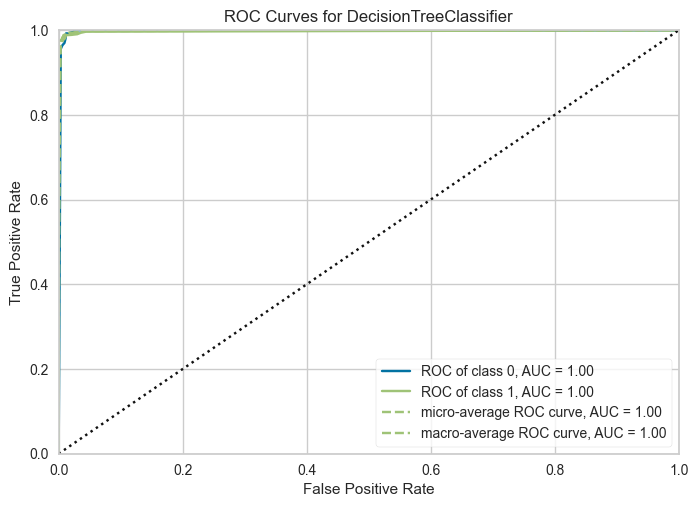

In [8]:
plot_model(best, plot = 'auc')

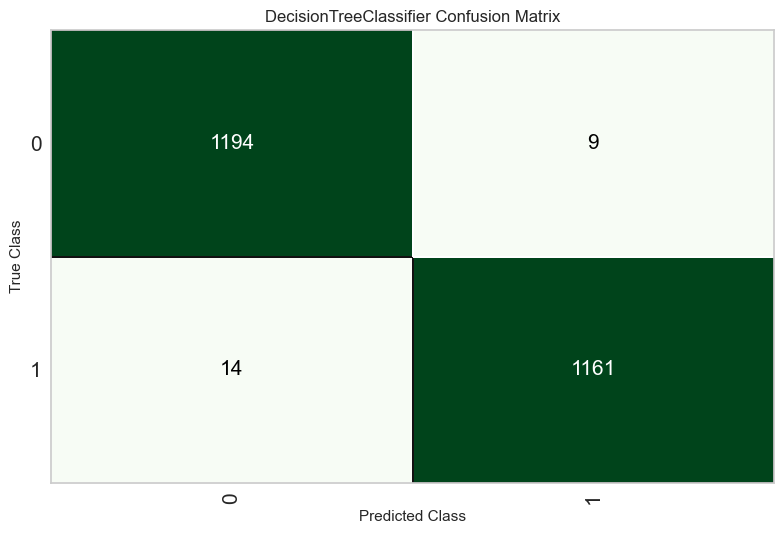

In [9]:
plot_model(best, plot = 'confusion_matrix')

In [10]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9903,0.9979,0.9903,0.9903,0.9903,0.9807,0.9807


In [11]:
holdout_pred.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,prediction_label,prediction_score
3370,flat,scaly,brown,bruises,none,free,close,broad,white,tapering,...,partial,white,one,pendant,black,several,woods,edible,edible,1.0
4466,flat,fibrous,gray,no,foul,free,close,broad,chocolate,enlarging,...,partial,white,one,large,chocolate,solitary,grasses,poisonous,poisonous,1.0
4232,flat,smooth,white,bruises,foul,free,close,broad,pink,tapering,...,partial,white,one,pendant,chocolate,scattered,urban,poisonous,poisonous,1.0
5058,convex,smooth,buff,bruises,foul,free,close,broad,white,tapering,...,partial,white,one,pendant,chocolate,scattered,urban,poisonous,poisonous,1.0
6305,convex,smooth,red,no,foul,free,close,narrow,buff,tapering,...,partial,white,one,evanescent,white,several,path,poisonous,poisonous,1.0


In [12]:
# copy data and drop Class variable

new_data = df.copy()
new_data.drop('class', axis=1, inplace=True)
new_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [13]:
predictions = predict_model(best, data = new_data)
predictions.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,prediction_label,prediction_score
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,white,partial,white,one,pendant,black,scattered,urban,poisonous,1.0
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,white,partial,white,one,pendant,brown,numerous,grasses,edible,1.0
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,white,partial,white,one,pendant,brown,numerous,meadows,edible,1.0
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,white,partial,white,one,pendant,black,scattered,urban,poisonous,1.0
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,partial,white,one,evanescent,brown,abundant,grasses,edible,1.0


In [14]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
s = setup(df2,log_experiment=True,experiment_name='211602C' session_id=123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(7932, 9)"
4,Transformed data shape,"(7932, 9)"
5,Transformed train set shape,"(5552, 9)"
6,Transformed test set shape,"(2380, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [16]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9930,0.9997,0.9927,0.9931,0.9929,0.9859,0.9860,0.0040
rf,Random Forest Classifier,0.9930,0.9997,0.9927,0.9931,0.9929,0.9859,0.9860,0.0270
et,Extra Trees Classifier,0.9930,0.9997,0.9927,0.9931,0.9929,0.9859,0.9860,0.0220
lightgbm,Light Gradient Boosting Machine,0.9930,0.9997,0.9927,0.9931,0.9929,0.9859,0.9860,0.0270
gbc,Gradient Boosting Classifier,0.9914,0.9996,0.9876,0.9949,0.9912,0.9827,0.9828,0.0200
knn,K Neighbors Classifier,0.9908,0.9973,0.9909,0.9906,0.9907,0.9816,0.9817,0.0110
svm,SVM - Linear Kernel,0.9726,0.0000,0.9683,0.9764,0.9722,0.9452,0.9455,0.0050
lr,Logistic Regression,0.9543,0.9790,0.9310,0.9755,0.9525,0.9084,0.9097,0.0060
qda,Quadratic Discriminant Analysis,0.9537,0.9868,0.9683,0.9403,0.9539,0.9075,0.9082,0.0050
ridge,Ridge Classifier,0.9260,0.0000,0.9683,0.8919,0.9283,0.8521,0.8557,0.0040


In [17]:
# check the final params of best model
best.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 123,
 'splitter': 'best'}

In [18]:
new_data = df2.copy()
new_data.drop('class', axis=1, inplace=True)
new_data.head()

,cap-shape_flat,cap-shape_convex,cap-surface_smooth,cap-surface_scaly,bruises,odor_none,gill-size,stalk-shape
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
predictions = predict_model(best, data = new_data)
predictions.head()

,cap-shape_flat,cap-shape_convex,cap-surface_smooth,cap-surface_scaly,bruises,odor_none,gill-size,stalk-shape,prediction_label,prediction_score
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,1.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1.0


In [20]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
final_best = finalize_model(best)
save_model(best,"../model/mushroomclass")

In [31]:
pipeline = load_model('../models/mushroomclass')


Transformation Pipeline and Model Successfully Loaded


In [33]:
predictions.head()

,cap-shape_flat,cap-shape_convex,cap-surface_smooth,cap-surface_scaly,bruises,odor_none,gill-size,stalk-shape,prediction_label,prediction_score
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,1.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1.0


In [34]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7932 entries, 0 to 7931
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cap-shape_flat      7932 non-null   float32
 1   cap-shape_convex    7932 non-null   float32
 2   cap-surface_smooth  7932 non-null   float32
 3   cap-surface_scaly   7932 non-null   float32
 4   bruises             7932 non-null   float32
 5   odor_none           7932 non-null   float32
 6   gill-size           7932 non-null   float32
 7   stalk-shape         7932 non-null   float32
 8   prediction_label    7932 non-null   int32  
 9   prediction_score    7932 non-null   float64
dtypes: float32(8), float64(1), int32(1)
memory usage: 341.0 KB
